## Observations and Insights  of the Avocado industry by Dawn Salisbury

Importing data

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
avocado_data = "Data/avocado_updated.csv"
hass_data_path1 = "Data/2020_Volume_Hass.csv"
hass_data_path2 = "Data/2017_Volume_Hass.csv"
hass_data_path3 = "Data/2018_Volume_Hass.csv"
hass_data_path4 = "Data/2019_Volume_Hass.csv"

#avocodo_data1 = pd.read_csv(avocado_data, index_col=0)
avocodo_data1 = pd.read_csv(avocado_data, thousands=',')

#Hass exporting data
hass_data2020 = pd.read_csv(hass_data_path1, thousands=',')
hass_data2017 = pd.read_csv(hass_data_path2)
hass_data2018 = pd.read_csv(hass_data_path3)
hass_data2019 = pd.read_csv(hass_data_path4)
# Read the mouse data and the study results

# Display the data table for preview
avocado_df = avocodo_data1

## Haas Avocado files and scrub

In [67]:
#Hass data2020 datafile unedited includes "Actual and Projected values"
hass_data2020 = pd.read_csv(hass_data_path1,)

#Remove "projected" data from Hass data2020
hass_data2020 = hass_data2020.loc[hass_data2020['Status'] == "Actual"]

hass_data2020.head()

,Week,Status,Total Volume,California,Chile,Mexico,Peru,Colombia
0,"Jan 5, 2020",Actual,"32,537,444","37,220","159,041","32,291,182",0,"50,000"
1,"Jan 12, 2020",Actual,"65,307,572","319,866","177,780","64,809,925",0,0
2,"Jan 19, 2020",Actual,"76,375,629","1,604,707","222,755","74,498,167",0,"50,000"
3,"Jan 26, 2020",Actual,"66,647,112","2,822,485",0,"63,774,627",0,"50,000"
4,"Feb 2, 2020",Actual,"45,414,983","2,704,489",0,"42,710,494",0,0


In [68]:
#Join all Hass data files form 2017 to 20190 (Projections removed)
Hass_combined_Data = pd.concat([hass_data2020, hass_data2019, hass_data2018,hass_data2017], axis=0, join='outer', ignore_index=False)

#updated the "week" to conform the same format
Hass_combined_Data["Week"]= pd.to_datetime(Hass_combined_Data["Week"], infer_datetime_format=True, format="%M/%D/%Y")

#Reviwing data and rows in Hass dataset
numOfRows = Hass_combined_Data.shape[0]
countofWeeks = Hass_combined_Data['Week'].nunique()

print('Count number of Rows in dataframe : ' , numOfRows)
print('Count number of Weeks: ',countofWeeks)    
#print results
Hass_combined_Data.head()

Count number of Rows in dataframe :  185
Count number of Weeks:  185


,Week,Status,Total Volume,California,Chile,Mexico,Peru,Colombia
0,2020-01-05,Actual,"32,537,444","37,220","159,041","32,291,182",0,"50,000"
1,2020-01-12,Actual,"65,307,572","319,866","177,780","64,809,925",0,0
2,2020-01-19,Actual,"76,375,629","1,604,707","222,755","74,498,167",0,"50,000"
3,2020-01-26,Actual,"66,647,112","2,822,485",0,"63,774,627",0,"50,000"
4,2020-02-02,Actual,"45,414,983","2,704,489",0,"42,710,494",0,0


## Avacado file 2015 to 2019 (December 1,2019) Scrub data

In [69]:
#avocado_df['Year'] = avocado_df.Year.astype(object)
avocado_df.dtypes

Unnamed: 0          int64
Date               object
Price             float64
Total Volume      float64
Small Avocado     float64
Large Avocado     float64
XLarge Avocado    float64
Total Bags        float64
Small Bags        float64
Large Bags        float64
XLarge Bags       float64
Year                int64
Region             object
Conventional       object
Organic            object
dtype: object

In [72]:
#Display avocado datafile Data from 2015 to 2019
avocado_df.dropna()
avocado_df.head()

,Unnamed: 0,Date,Price,Total Volume,Small Avocado,Large Avocado,XLarge Avocado,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Region,Conventional,Organic
0,0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015,Albany,conventional,NaN
1,1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,2015,Albany,conventional,NaN
2,2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,2015,Albany,conventional,NaN
3,3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,2015,Albany,conventional,NaN
4,4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,2015,Albany,conventional,NaN


In [73]:
#Clean up avocado data for regions multiple spellings to be correction

avocado_df['Region']=avocado_df['Region'].replace(
   {'BaltimoreWashington':'Baltimore/Washington',
   'BuffaloRochester':'Buffalo/Rochester', 
   'CincinnatiDayton':'Cincinnati/Dayton',
   'DallasFtWorth':'Dallas/Ft. Worth',
    'GreatLakes':'Great Lakes',
   'GrandRapids':'Grand Rapids', 
   'HarrisburgScranton':'Harrisburg/Scranton', 
   'HartfordSpringfield':'Hartford/Springfield', 
   'LasVegas':'Las Vegas', 
   'LosAngeles':'Los Angeles',
    'MiamiFtLauderdale':'Miami/Ft. Lauderdale',
   'NewOrleansMobile':'New Orleans/Mobile', 
    'NewYork':'New York',
    'NorthernNewEngland':'Northern New England',
    'PhoenixTucson':'Phoenix/Tucson',
    'RaleighGreensboro':'Raleigh/Greensboro',
    'RichmondNorfolk':'Richmond/Norfolk',
    'SanDiego':'San Diego',
    'SanFrancisco':'San Francisco',
    'SouthCarolina':'South Carolina',
    'SouthCentral':'South Central',
    'StLouis':'St. Louis',
    'WestTexNewMexico':'W Tex/New Mexico',
    'West Tex/New Mexico':'W Tex/New Mexico',
    'TotalUS':'All Other US',
    'Total U.S.':'All Other US'})   

numOfRows = avocado_df.shape[0]
countofRegions = avocado_df['Region'].nunique()

print('Count number of Rows in dataframe : ' , numOfRows)
print('Count number of Regions: ',countofRegions)      

avocado_df['Region'].value_counts().sort_index()

Count number of Rows in dataframe :  27323
Count number of Regions:  54


Albany                  506
All Other US            506
Atlanta                 506
Baltimore/Washington    506
Boise                   506
Boston                  506
Buffalo/Rochester       506
California              506
Charlotte               506
Chicago                 506
Cincinnati/Dayton       506
Columbus                506
Dallas/Ft. Worth        506
Denver                  506
Detroit                 506
Grand Rapids            506
Great Lakes             506
Harrisburg/Scranton     506
Hartford/Springfield    506
Houston                 506
Indianapolis            506
Jacksonville            506
Las Vegas               506
Los Angeles             506
Louisville              506
Miami/Ft. Lauderdale    506
Midsouth                506
Nashville               506
New Orleans/Mobile      506
New York                506
Northeast               506
Northern New England    506
Orlando                 506
Philadelphia            506
Phoenix/Tucson          506
Pittsburgh          

In [74]:
#Data to be used for reporting and plotting graphs
RegionType=avocado_df[["Region", "Small Avocado", "Large Avocado", "XLarge Avocado","Total Bags"]]  #Year

RegionType.head()

,Region,Small Avocado,Large Avocado,XLarge Avocado,Total Bags
0,Albany,2819.50,28287.42,49.90,9716.46
1,Albany,1002.85,31640.34,127.12,8424.77
2,Albany,914.14,31540.32,135.77,11921.05
3,Albany,941.38,33196.16,164.14,10845.82
4,Albany,1353.90,60017.20,179.32,9323.18


In [75]:
#How to find totals by year
MMMVol = avocado_df.groupby(["Region","Year"]).agg({"Total Volume":['min', 'mean', 'max']})
MMMVol
YRVol= avocado_df.groupby(["Year"]).agg({"Total Volume":['min', 'mean', 'max']})
YRVol.columns=YRVol.columns.droplevel(0)
YRVol['mean']=YRVol['mean'].map('{:,.2f}'.format)

YRVol

,min,mean,max
Year,,,
2015,84.56,"781,027.37",44655461.51
2016,385.55,"858,420.56",52288697.89
2017,515.01,"860,081.35",61034457.10
2018,404.62,"1,040,918.99",63716144.15
2019,253.45,"1,044,699.89",62451514.93


In [76]:

Small=avocado_df[["Region","Small Avocado"]].mean().map('{:,.2f}'.format)
Large=avocado_df[["Region","Large Avocado"]].mean().map('{:,.2f}'.format)
XLarge=avocado_df[["Region","XLarge Avocado"]].mean().map('{:,.2f}'.format)
Total_Bags=avocado_df[["Region","Total Bags"]].mean().map('{:,.2f}'.format)

print(f"The mean volume of Small avocado sold accross US: {Small}")
print(f"The mean volume of Large avocado sold accross US: {Large}")
print(f"The mean volume of XLarge avocado sold accross US: {XLarge}")
print(f"The mean volume of Total Bags avocado sold accross US: {Total_Bags}")

The mean volume of Small avocado sold accross US: Small Avocado    295,318.73
dtype: object
The mean volume of Large avocado sold accross US: Large Avocado    290,105.93
dtype: object
The mean volume of XLarge avocado sold accross US: XLarge Avocado    22,158.68
dtype: object
The mean volume of Total Bags avocado sold accross US: Total Bags    305,873.96
dtype: object


In [77]:
SmallCounts = avocado_df["Small Avocado"].sum()
print("Total Small Avocados for data" , SmallCounts)

LargeCounts = avocado_df["Large Avocado"].sum()
print("Total Large Avocados for data" , LargeCounts)

XLargeCounts = avocado_df["XLarge Avocado"].sum()
print("Total XLarge Avocados for data" , XLargeCounts)

BagCounts = avocado_df["Total Bags"].sum()
print("Total Bags Avocados for data" , BagCounts)

YearCounts=pd.DataFrame({"Total Small Avocados for data":[SmallCounts],"Total Large Avocados for data":[LargeCounts]
                        ,"Total XLarge Avocados for data":[XLargeCounts],"Total Bags Avocados for data":[BagCounts]})
YearCounts
#YRVol['mean']=YRVol['mean'].map('{:,.2f}'.format)

Total Small Avocados for data 8068993745.09
Total Large Avocados for data 7926564440.81
Total XLarge Avocados for data 605441564.1600001
Total Bags Avocados for data 8357394157.67


,Total Small Avocados for data,Total Large Avocados for data,Total XLarge Avocados for data,Total Bags Avocados for data
0,8.068994e+09,7.926564e+09,6.054416e+08,8.357394e+09


In [78]:
#stat_table1 = pd.DataFrame(avocado_df.groupby("Region").count())

Tot_small = avocado_df["Small Avocado"].sum()
Tot_Large = avocado_df["Large Avocado"].sum()
Tot_XLarge = avocado_df["XLarge Avocado"].sum()
Tot_Bags = avocado_df["Total Bags"].sum()

print("Total Small Avocados for data" , Tot_small)
print("Total Large Avocados for data" , Tot_Large)
print("Total XLarge Avocados for data" , Tot_XLarge)
print("Total Bags Avocados for data" , Tot_Bags)

Total Small Avocados for data 8068993745.09
Total Large Avocados for data 7926564440.81
Total XLarge Avocados for data 605441564.1600001
Total Bags Avocados for data 8357394157.67


In [65]:
#All totals of all avocado types in lbs
Tot_Small = avocado_df["Small Avocado"].sum()
Tot_Large = avocado_df["Large Avocado"].sum()
Tot_XLarge = avocado_df["XLarge Avocado"].sum()
Tot_Bags= avocado_df["Total Bags"].sum()
Tot_Volume = Tot_Small + Tot_Large + Tot_XLarge + Tot_Bags

print("Total Volume for all sales in all regions" , Tot_Volume)
#Tot_Volume.sum()

Total Volume for all sales in all regions 24958393907.730003


24958393907.730003

## Plotting for Avacado data file 2015 to 2019

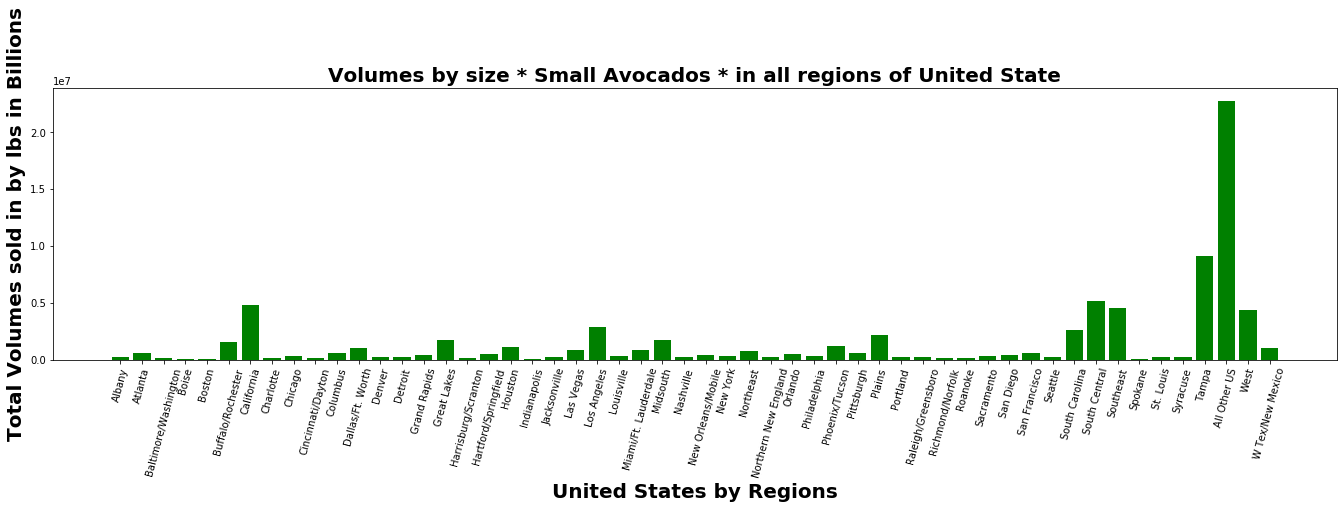

In [79]:
#Can the type of avocado offered affect sales? Small Avocado
plt.figure(figsize=(23,5))
plt.bar(avocado_df['Region'],avocado_df['Small Avocado'],color='g')
plt.title("Volumes by size * Small Avocados * in all regions of United State", fontsize=20, fontweight="bold",)
plt.xlabel('United States by Regions', fontsize=20, fontweight="bold")
plt.ylabel('Total Volumes sold in by lbs in Billions',fontsize=20, fontweight="bold")
plt.xticks(rotation=75)
plt.savefig('Small_Avocado_ByRegion_Plot.png')
plt.show()

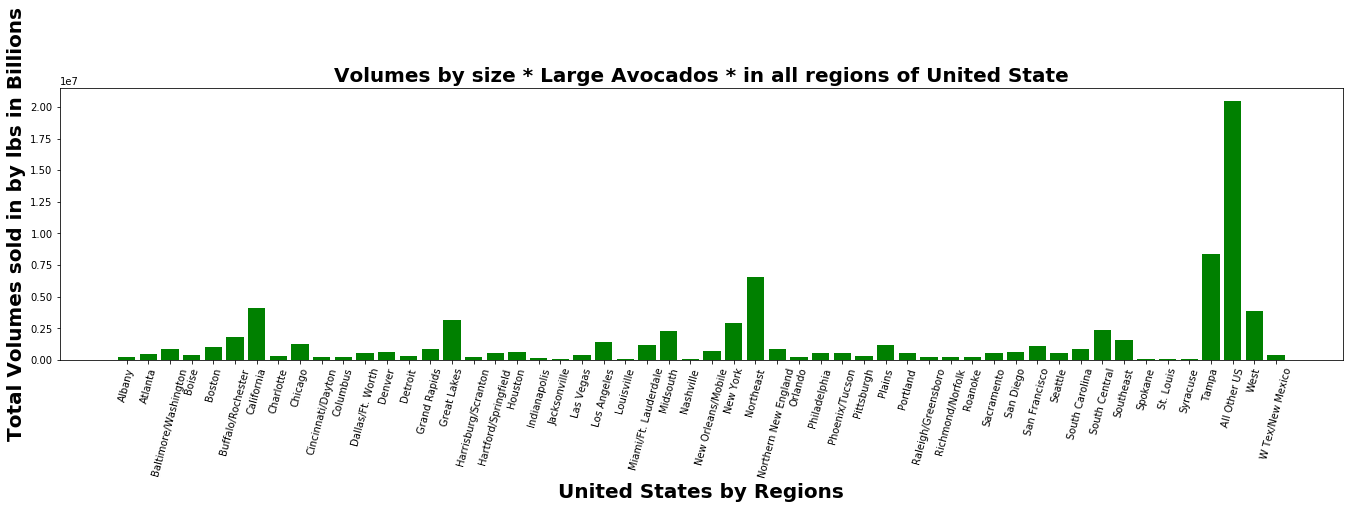

In [80]:
#Can the type of avocado offered affect sales? Large Avocado
plt.figure(figsize=(23,5))
plt.bar(avocado_df['Region'],avocado_df['Large Avocado'],color='g')
plt.title("Volumes by size * Large Avocados * in all regions of United State", fontsize=20, fontweight="bold")
plt.xlabel('United States by Regions', fontsize=20, fontweight="bold")
plt.ylabel('Total Volumes sold in by lbs in Billions',fontsize=20, fontweight="bold")
plt.xticks(rotation=75)
plt.savefig('Large_Avocado_ByRegion_Plot.png')
plt.show()


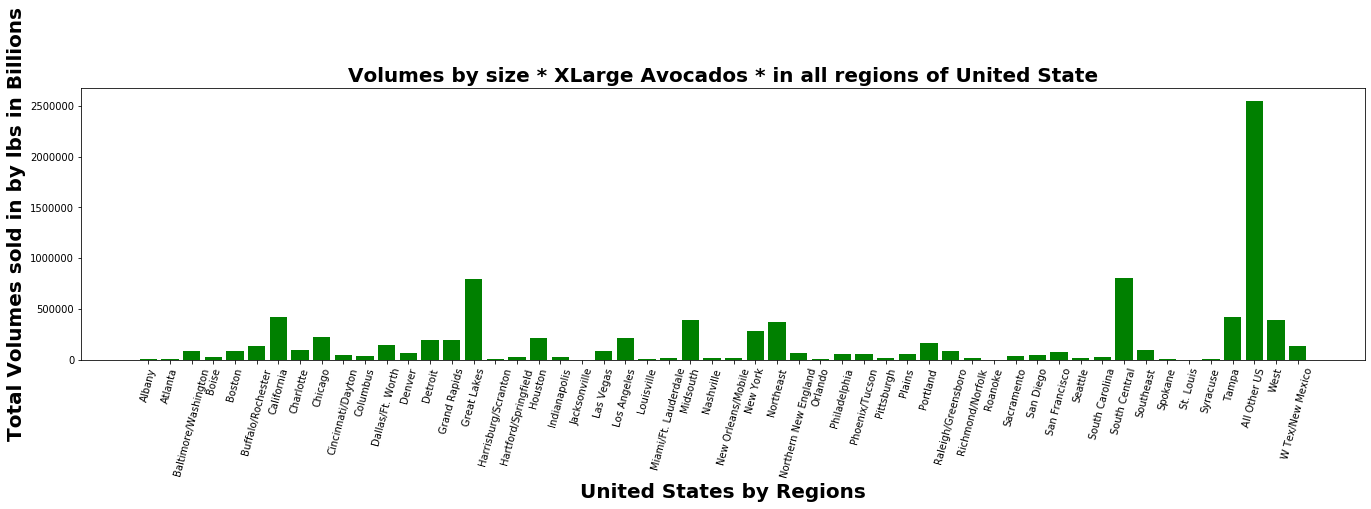

In [81]:
#Can the type of avocado offered affect sales? XLarge Avocado
plt.figure(figsize=(23,5))
plt.bar(avocado_df['Region'],avocado_df['XLarge Avocado'],color='g')
plt.title("Volumes by size * XLarge Avocados * in all regions of United State", fontsize=20, fontweight="bold")
plt.xlabel('United States by Regions', fontsize=20, fontweight="bold")
plt.ylabel('Total Volumes sold in by lbs in Billions',fontsize=20, fontweight="bold")
plt.xticks(rotation=75)
plt.savefig('XLarge_Avocado_ByRegion_Plot.png')
plt.show()

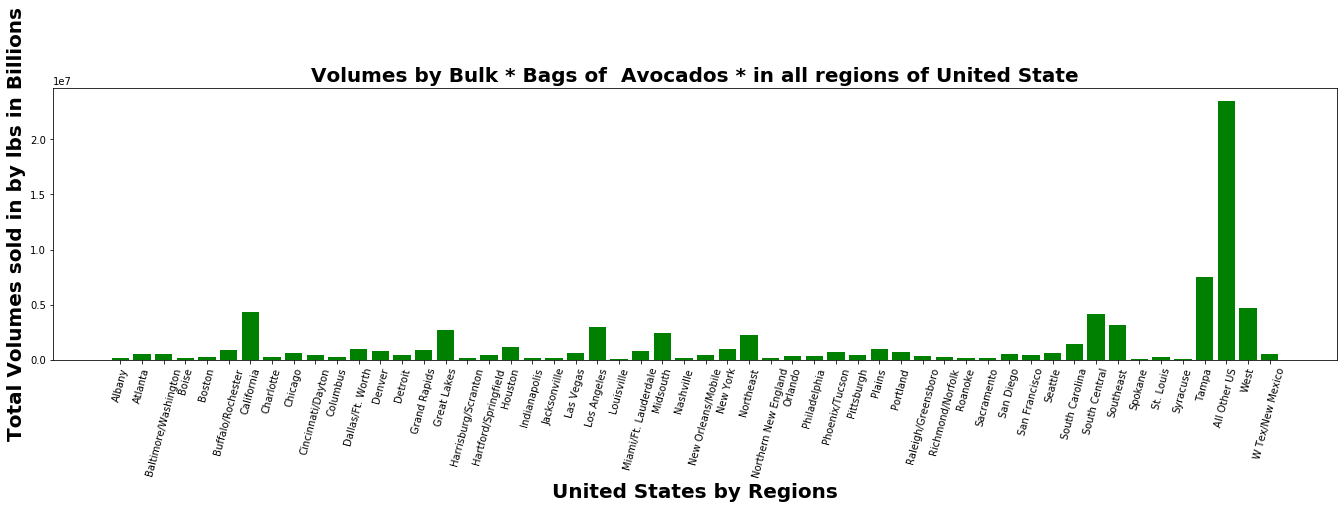

In [82]:
#Can the type of avocado offered affect sales? Bulk slaes avaovado Bags
plt.figure(figsize=(23,5))
plt.bar(avocado_df['Region'],avocado_df['Total Bags'],color='g')
plt.title("Volumes by Bulk * Bags of  Avocados * in all regions of United State", fontsize=20, fontweight="bold")
plt.xlabel('United States by Regions', fontsize=20, fontweight="bold")
plt.ylabel('Total Volumes sold in by lbs in Billions',fontsize=20, fontweight="bold")
plt.xticks(rotation=75)
plt.savefig('Total_Bags_Avocado_ByRegion_Plot.png')
plt.show()

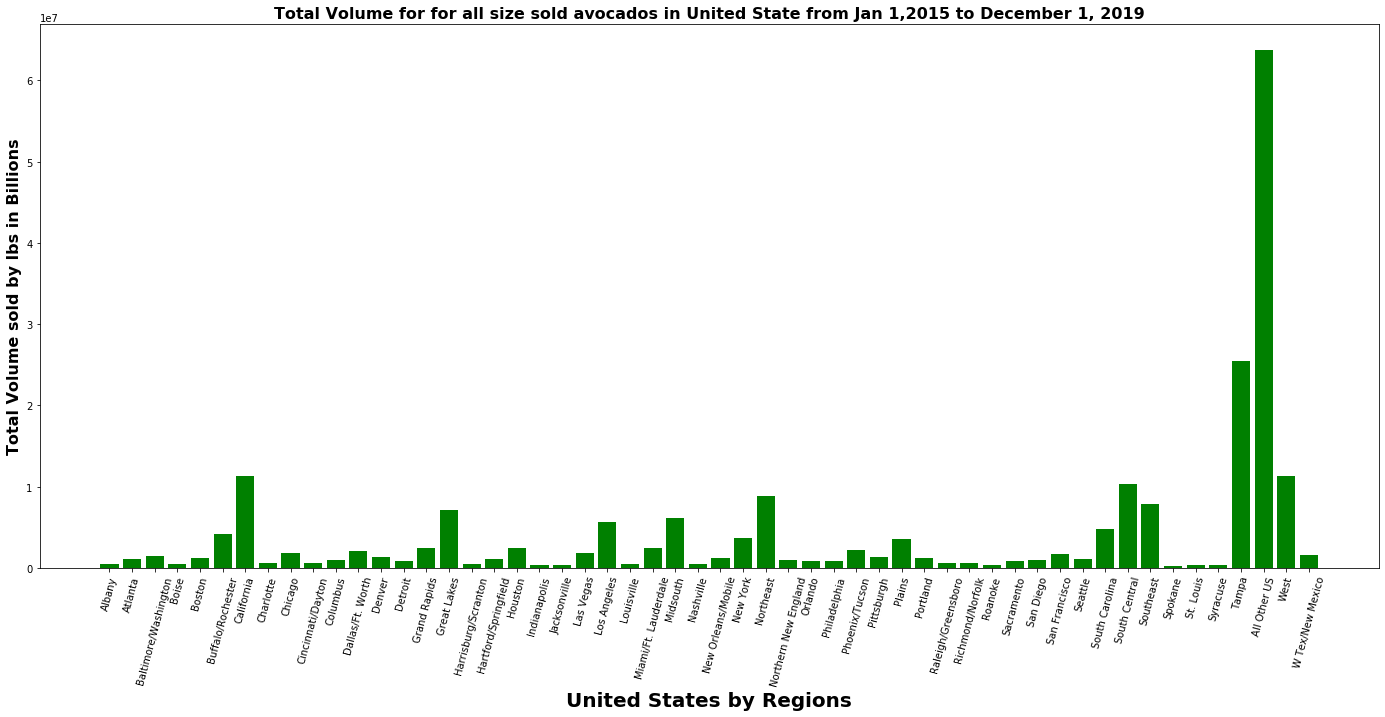

In [83]:
#Plotting data by Region and total volumes January 2015 to December 1, 2019 
plt.figure(figsize=(24,10))
plt.bar(avocado_df['Region'],avocado_df['Total Volume'],color='g')
plt.title("Total Volume for for all size sold avocados in United State from Jan 1,2015 to December 1, 2019", fontsize=16, fontweight="bold")
plt.xlabel('United States by Regions', fontsize=20, fontweight="bold")
plt.ylabel('Total Volume sold by lbs in Billions',fontsize=16, fontweight="bold")
plt.xticks(rotation=75)
plt.savefig('Total Vol_Avocado_ByRegion_Plot.png')
plt.show()

## Completed Plotting data

In [84]:
## Summary Statistics